<a href="https://colab.research.google.com/github/MiggieCS911/DrugRepuposingSGLT2i/blob/main/DrugLikenessSGLT2_show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import RDKit
[RDKit in Colab](https://iwatobipen.wordpress.com/2018/11/01/run-rdkit-and-deep-learning-on-google-colab-rdkit/comment-page-1/)

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-10-03 08:51:47--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   167MB/s    in 0.5s    

2021-10-03 08:51:48 (167 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

[RDKit Doc](https://www.rdkit.org/docs/api-docs.html)

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Load data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/sglt2i_ic50_activity.csv')

In [ ]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,assay_chembl_id,assay_description,document_chembl_id,document_year,molecule_pref_name,units,pchembl_value,bioactivity
0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,11.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,7.96,active
1,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,491.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,6.31,inactive
2,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,458.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,6.34,inactive
3,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,532.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,6.27,inactive
4,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,754.0,CHEMBL863286,Inhibitory activity towards human SGLT2 expres...,CHEMBL1141232,2005,NaN,uM,6.12,inactive


# Lipinski descriptors
drug likeness => rule of 5 <br>
Molecular weight < 500 Dalton <br>
Octanol-water partition coefficient (LogP) < 5 <br>
Hydrogen bond donors < 5 <br>
Hydrogen bond acceptors < 10 <br>

In [ ]:
#test
smi = df.loc[120,'canonical_smiles']

mol=Chem.MolFromSmiles(smi) 

mol_wt = Descriptors.MolWt(mol)
mol_logp = Descriptors.MolLogP(mol)
numH_donors = Lipinski.NumHDonors(mol)
numH_acceptors = Lipinski.NumHAcceptors(mol)

print(smi)
print(f'Molecular weight: {mol_wt}')
print(f'Octanol-water partition coefficient (LogP): {mol_logp}')
print(f'Hydrogen bond donor: {numH_donors}')
print(f'Hydrogen bond donor: {numH_acceptors}')

CCOc1ccc(Cc2cc([C@@H]3OC(OC)[C@@H](O)[C@H](O)[C@H]3O)ccc2Cl)cc1
Molecular weight: 408.87800000000004
Octanol-water partition coefficient (LogP): 2.4560000000000004
Hydrogen bond donor: 3
Hydrogen bond donor: 6


## create function for Lipinski rules
for apply to pandas df

In [ ]:
#Lipinski descriptors

def molwt_smi(x):
  return Descriptors.MolWt(Chem.MolFromSmiles(x))

def mollogp_smi(x):
  return Descriptors.MolLogP(Chem.MolFromSmiles(x))

def h_donor(x):
  return Lipinski.NumHDonors(Chem.MolFromSmiles(x))

def h_acceptor(x):
  return Lipinski.NumHAcceptors(Chem.MolFromSmiles(x))

In [ ]:
df['Molecular_Wt'] = df.canonical_smiles.apply(molwt_smi)
df['LogP'] = df.canonical_smiles.apply(mollogp_smi)
df['HDonor'] = df.canonical_smiles.apply(h_donor)
df['HAcceptor'] = df.canonical_smiles.apply(h_acceptor)

In [ ]:
df[['canonical_smiles','Molecular_Wt', 'LogP', 'HDonor', 'HAcceptor']].head()

,canonical_smiles,Molecular_Wt,LogP,HDonor,HAcceptor
0,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,458.463,1.44102,5,9
1,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,454.479,1.58142,5,8
2,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,456.495,0.77012,5,8
3,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,470.522,1.02410,5,8
4,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,470.522,0.78052,4,9


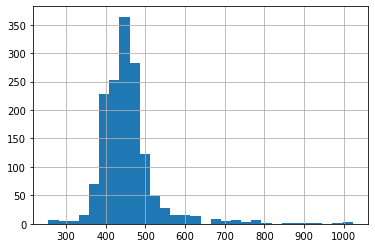

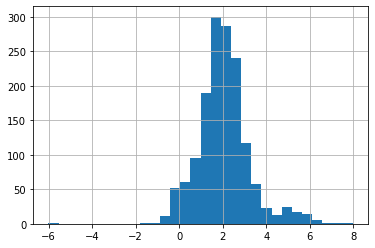

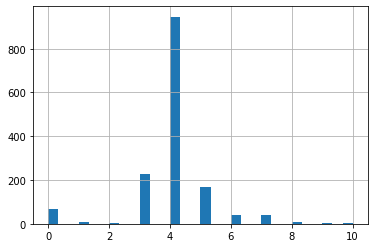

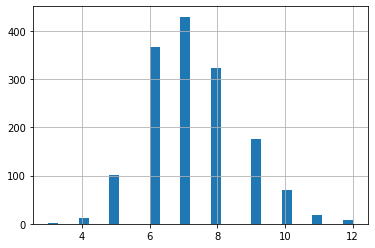

In [ ]:
plots = ['Molecular_Wt', 'LogP', 'HDonor', 'HAcceptor']

for var in plots:
  df[var].hist(bins=30)
  plt.show()

# Convert IC50 to pIC50
for more good distribution<br>
pIC50 = -log10(IC50) <br>
IC50 -> unit nM => x *10^-9 to turn to M 

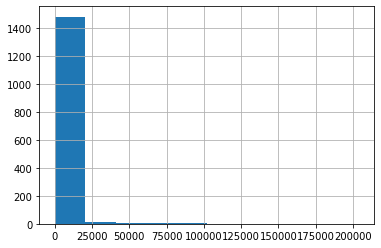

In [ ]:
df.standard_value.hist()

In [ ]:
# function convert to pIC50

def to_pIC50(x):
  return -np.log10(x*10**(-9))

In [ ]:
df['pIC50'] = df.standard_value.apply(to_pIC50)

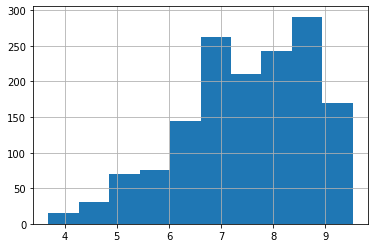

In [ ]:
df.pIC50.hist()

In [ ]:
df.columns


Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'assay_chembl_id', 'assay_description', 'document_chembl_id',
       'document_year', 'molecule_pref_name', 'units', 'pchembl_value',
       'bioactivity', 'Molecular_Wt', 'LogP', 'HDonor', 'HAcceptor', 'pIC50'],
      dtype='object')

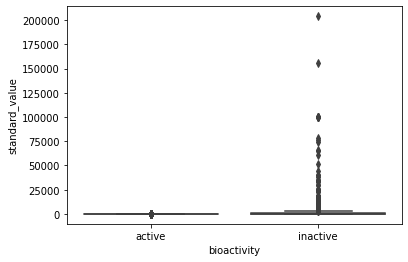

In [ ]:
sns.boxplot(data=df,x='bioactivity',y='standard_value')

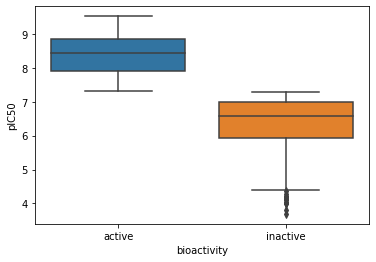

In [ ]:
sns.boxplot(data=df,x='bioactivity',y='pIC50')

### Interpretation
IC50 -> big -> no activity<br>
pIC50 -> big -> more activity

In [ ]:
df[['standard_value','pIC50']].describe()

,standard_value,pIC50
count,1511.000000,1511.000000
mean,2022.604523,7.503257
std,11140.137808,1.226968
min,0.300000,3.690370
25%,2.950000,6.769551
50%,22.000000,7.657577
75%,170.000000,8.530178
max,204000.000000,9.522879


In [ ]:
# df.to_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/sglt2i_ic50_activity_pIC50.csv', index=None)

# EDA

In [ ]:
dfeda = df[['standard_value','bioactivity', 'Molecular_Wt',
            'LogP', 'HDonor', 'HAcceptor', 'pIC50']].copy()

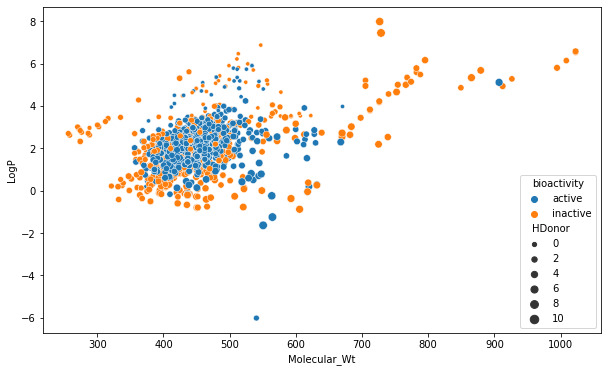

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfeda, x='Molecular_Wt', y = 'LogP',
                hue = 'bioactivity', size = 'HDonor')

plt.show()

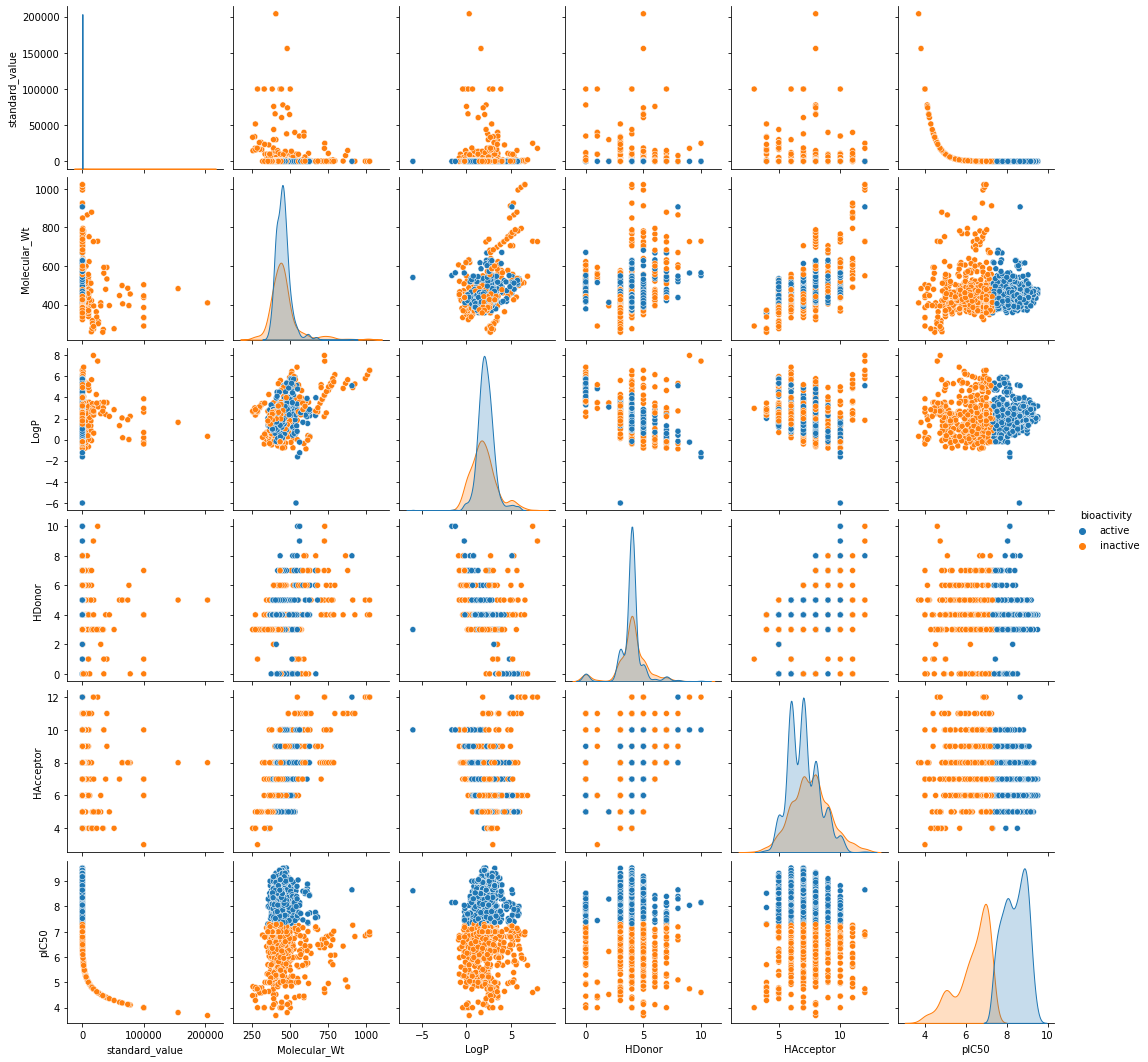

In [ ]:
sns.pairplot(dfeda, hue='bioactivity')

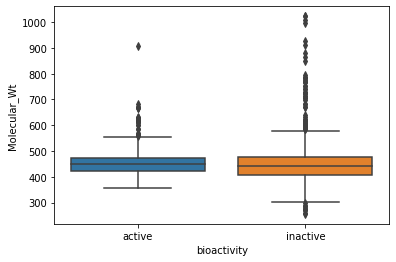

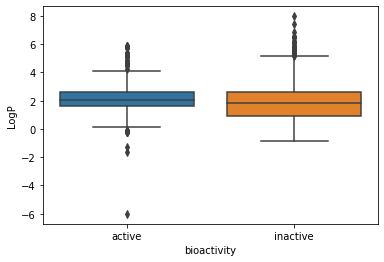

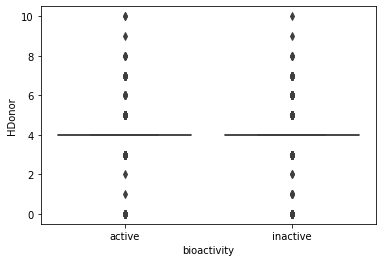

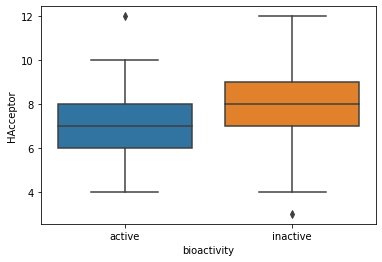

In [ ]:
# each chemoinfo along with activity

plots = [ 'Molecular_Wt', 'LogP', 'HDonor', 'HAcceptor']

for var in plots:
  sns.boxplot(data=dfeda, x = 'bioactivity', y = var)
  plt.show()

Chemo-info --> not associated with SGLT2i